# WordNet

## !pip install nltk=3.2.5

In [4]:
from nltk.corpus import wordnet as wn

def get_hypernyms(synset):
    current_node = synset
    while True:
        print(current_node)
        hypernym = current_node.hypernyms()
        if len(hypernym) == 0:
            break
        current_node = hypernym[0]

In [5]:
get_hypernyms(wn.synsets('policeman')[0])

Synset('policeman.n.01')
Synset('lawman.n.01')
Synset('defender.n.01')
Synset('preserver.n.03')
Synset('person.n.01')
Synset('causal_agent.n.01')
Synset('physical_entity.n.01')
Synset('entity.n.01')


In [7]:
get_hypernyms(wn.synsets('firefighter')[0])

Synset('fireman.n.04')
Synset('defender.n.01')
Synset('preserver.n.03')
Synset('person.n.01')
Synset('causal_agent.n.01')
Synset('physical_entity.n.01')
Synset('entity.n.01')


In [8]:
get_hypernyms(wn.synsets('sheriff')[0])

Synset('sheriff.n.01')
Synset('lawman.n.01')
Synset('defender.n.01')
Synset('preserver.n.03')
Synset('person.n.01')
Synset('causal_agent.n.01')
Synset('physical_entity.n.01')
Synset('entity.n.01')


In [9]:
get_hypernyms(wn.synsets('mailman')[0])

Synset('mailman.n.01')
Synset('deliveryman.n.01')
Synset('employee.n.01')
Synset('worker.n.01')
Synset('person.n.01')
Synset('causal_agent.n.01')
Synset('physical_entity.n.01')
Synset('entity.n.01')


In [10]:
get_hypernyms(wn.synsets('student')[0])

Synset('student.n.01')
Synset('enrollee.n.01')
Synset('person.n.01')
Synset('causal_agent.n.01')
Synset('physical_entity.n.01')
Synset('entity.n.01')


# TF-IDF

#### 문서에서 워드 갯수

In [11]:
def get_term_frequency(document, word_dict=None):
    if word_dict is None:
        word_dict = {}
    words = document.split()

    for w in words:
        word_dict[w] = 1 + (0 if word_dict.get(w) is None else word_dict[w])

    return word_dict

### 문서들이 주어지고 각각의 단어 갯수

In [10]:
def get_document_frequency(documents):
    dicts = []
    vocab = set([])
    df = {}

    for d in documents:
        tf = get_term_frequency(d)
        dicts += [tf]
        vocab = vocab | set(tf.keys())
    
    for v in list(vocab):
        df[v] = 0
        for dict_d in dicts:
            if dict_d.get(v) is not None:
                df[v] += 1

    return df

In [8]:
doc1 = '''
지능 지수 라는 말 들 어 보 셨 을 겁니다 . 여러분 의 지성 을 일컫 는 말 이 죠 . 그런데 심리 지수 란 건 뭘까요 ? 사람 들 이 특정 한 식 으로 행동 하 는 이유 에 대해 여러분 은 얼마나 알 고 계시 나요 ? 또 타인 이나 심지어 여러분 의 행동 을 예측 하 는 일 은 얼마나 잘 하 시 나요 ? 또 , 심리학 에 대해 갖춘 지식 중 에서 어느 정도 나 잘못 된 것 일까요 ? 심리학 에 관한 열 가지 신화 를 통해 잘못 된 것 들 을 알아보 도록 하 죠 . 여러분 은 한 번 쯤 들 어 보 셨 을 법 한 것 은 자신 들 의 심리학 에 대해 고려 할 때 , 거의 항상 남자 는 화성 에서 왔 고 , 여자 는 금성 에서 온 것 같 다고 합니다 . 하지만 실제로 남자 와 여자 는 얼마나 다른 걸까요 ? 이 를 알아보 기 위해 , 일단 남녀 사이 에 확실 하 게 차이 나 는 것 을 살펴보 고 심리학 적 인 성별 간 의 차이점 을 동일 한 척도 상 에서 대비 해 보 도록 하 겠 습니다 . 남자 와 여자 간 에 실제로 차이 나 는 능력 중 하나 는 그 들 이 공 을 얼마나 멀리 던질 수 있 느냐 하 는 것 입니다 . 여기 남자 들 의 데 이타 를 보 시 면 , 정상 분포 곡선 이 라는 걸 볼 수 있 습니다 . 남자 들 소수 는 정말 멀리 던지 고 , 남자 들 소수 는 멀리 던지 지 못하 지만 , 남자 들 대부분 은 평균 적 인 거리 를 던졌 습니다 . 여자 들 도 역시 비슷 한 분포 상태 를 보입니다 만 사실 남녀 사이 엔 커다란 차이 가 있 습니다 . 사실 , 평균 수준 의 남자 라면 모든 여성 중 대략 98 % 보다 더 멀리 던질 수 있 거든요 . 이 와 동일 하 게 표준 화 된 척도 상 에서 심리학 에서 말 하 는 성별 간 의 차이 를 살펴 봅시다 . 심리학자 라는 여러분 에게 말 하 길 남자 들 의 공간 지각 능력 이 여자 들 보다 뛰어나 다고 할 겁니다 . 예 를 들 어 , 지도 읽 는 능력 같 은 건데 , 맞 는 말 입니다 . 하지만 그 차이 의 정도 를 살펴봅시다 . 아주 작 죠 . 두 선 이 너무 근접 해서 거의 겹칠 정도 입니다 .
'''

doc2 = '''
최상 의 제시 유형 은 학습 자 에 좌우 되 는 것 이 아니 라 학습 해야 할 내용 에 따라 좌우 됩니다 . 예 를 들 어 여러분 이 운전 하 기 를 배울 때 실제로 몸 으로 체감 하 는 경험 없이 누군가 가 어떻게 할 지 이야기 하 는 것 을 듣 는 것 만 으로 배울 수 있 습니까 ? 연립 방정식 을 풀 어야 하 는데 종이 에 쓰 지 않 고 머리 속 에서 말 하 는 것 으로 풀 수 가 있 을까요 ? 또는 만일 여러분 이 체감 형식 의 학습 자 유형 이 라면 , 건축학 시험 을 해석 적 춤 을 이용 하 여 수정 할 수 있 을까요 ? 아니 죠 ! 배워야 할 내용 을 제시 된 유형 에 맞추 어야 합니다 , 당신 에게 맞추 는 게 아니 라요 . 여러분 들 상당수 가 " A " 급 의 우등 생 이 라는 걸 아 는데 , 조만간 중등 학력 인증 시험 ( GCSE ) 결과 를 받 게 되 시 겠 네요 . 그런데 , 만일 , 여러분 들 이 희망 했 던 성적 을 받 지 못하 게 된다 해도 여러분 들 의 학습 방식 을 탓 해서 는 안 되 는 겁니다 . 여러분 이 비난 할 수 있 는 한 가지 는 바로 유전자 입니다 . 이건 최근 에 런던 대학교 ( UCL ) 에서 수행 했 던 연구 결과 는 여러 학생 들 과 그 들 의 중등 학력 인증 시험 결과 사이 의 차이 중 58 % 는 유전 적 인 요인 으로 좁혀졌 습니다 . 매우 정밀 한 수치 처럼 들립니다 . 그러면 어떻게 알 수 있 을까요 ? 유전 적 요인 과 환경 적 요인 의 상대 적 기여 도 를 알 고 싶 을 때 우리 가 사용 할 수 있 는 방식 은 바로 쌍둥이 연구 입니다 . 일 란 성 쌍생아 의 경우 환경 적 요인 과 유전 적 요인 모두 를 100 % 똑같이 공유 하 게 되 지만 이란 성 쌍생아 의 경우 는 100 % 동일 한 환경 을 공유 하 지만 유전자 의 경우 여타 의 형제자매 들 처럼 50 % 만 공유 하 게 됩니다 . 따라서 일 란 성 쌍둥이 와 이란 성 쌍둥이 사이 의 인증 시험 결과 가 얼마나 비슷 한지 비교 해 보 고 여기 에 약간 의 수학 적 계산 을 더하 게 되 면 그 수행 능력 의 차이 중 어느 정도 가 환경 적 요인 의 탓 이 고 어느 정도 가 유전자 탓 인지 를 알 수 있 게 됩니다 .
'''

doc3 = '''
그러나 이 이야기 는 세 가지 이유 로 인해 신화 입니다 . 첫째 , 가장 중요 한 건 실험실 가운 은 흰색 이 아니 라 회색 이 었 다 라는 점 이 죠 . 둘째 , 참 여자 들 은 실험 하 기 전 에 와 참여 자 들 이 걱정 을 표현 할 때 마다 상기 시키 는 말 을 들 었 는데 , 전기 충격 이 고통 스럽 기 는 하 지만 , 치명 적 이 지 는 않 으며 실제로 영구 적 인 손상 을 남기 는 일 은 없 을 거 라는 것 이 었 습니다 . 셋째 , 참 여자 들 은 단지 가운 을 입 은 사람 이 시켜 전기 충격 을 주지 는 않 았 죠 . 실험 이 끝나 고 그 들 의 인터뷰 를 했 을 때 모든 참여 자 들 은 강한 신념 을 밝혔 는데 , ' 학습 과 처벌 ' 연구 가 과학 적 으로 가치 있 는 목적 을 수행 했 기 때문 에 비록 동료 참여 자 들 에게 가해진 순간 적 인 불편 함 에 반해서 과학 을 위해서 오래 남 을 성과 를 얻 을 것 이 라고 말 이 죠 . 그러 다 보 니 제 가 이야기 를 한 지 벌써 12 분 이 되 었 습니다 . 여러분 들 중 에 는 아마 거기 앉 아서 제 이야기 를 들으시는 동안 저 의 말투 와 몸짓 을 분석 하 면서 제 가 말 하 는 어떤 것 을 인지 해야 할까 해결 하 려고 하 셨 을 겁니다 , 제 가 진실 을 이야기 하 는 지 , 또는 거짓말 을 하 고 있 는 것 인지 말 이 죠 . 만일 그러 셨 다면 , 아마 지금 쯤 완전히 실패 하 셨 을 겁니다 . 왜냐하면 우리 모두 가 사람 이 말 하 는 패턴 과 몸짓 으로 도 거짓말 여부 를 알아내 는 것 이 가능 하 다고 생각 하 지만 , 오랜 세월 수백 회 에 걸쳐 행해진 실제 심리 검사 의 결과 를 보 면 우리 들 모두 는 , 심지어 경찰관 이나 탐정 들 을 포함 해서 도 기본 적 으로 몸짓 과 언어 적 패턴 으로 거짓말 을 탐지 하 는 것 은 운 에 맞 길 수 밖 에 는 없 는 것 입니다 . 흥미 롭 게 도 한 가지 예외 가 있 는데요 : 실종 된 친척 을 찾 아 달 라고 호소 하 는 TV 홍보 입니다 .
'''

In [9]:
def get_tfidf(docs, top_k=30):
    vocab = {}
    tfs = []
    
    ## 문서별  TF
    for d in docs:
        vocab = get_term_frequency(d, vocab)
        tfs += [get_term_frequency(d)]
    df = get_document_frequency(docs)

    from operator import itemgetter
    import numpy as np
    sorted_vocab = sorted(vocab.items(), key=itemgetter(1), reverse=True)
    
    ## 모든 다큐에서 단어 갯수 구하기

    stats = []
    for v, freq in sorted_vocab:
        tfidfs = []
        for idx in range(len(docs)):
            if tfs[idx].get(v) is not None:
                tfidfs += [tfs[idx][v] * np.log(len(docs) / df[v])]
            else:
                tfidfs += [0]

        stats += [(v, freq, tfidfs, max(tfidfs))]

    sorted_tfidfs = sorted(stats, key=itemgetter(3), reverse=True)[:top_k]
    for v, freq, tfidfs, max_tfidfs in sorted_tfidfs:
        print('%s\t%d\t%s' % (v, freq, '\t'.join(['%.4f' % tfidfs[i] for i in range(len(docs))])))

In [12]:
get_tfidf([doc1, doc2, doc3])

남자	9	9.8875	0.0000	0.0000
요인	6	0.0000	6.5917	0.0000
심리학	5	5.4931	0.0000	0.0000
멀리	4	4.3944	0.0000	0.0000
시험	4	0.0000	4.3944	0.0000
환경	4	0.0000	4.3944	0.0000
성	4	0.0000	4.3944	0.0000
었	4	0.0000	0.0000	4.3944
제	4	0.0000	0.0000	4.3944
대해	3	3.2958	0.0000	0.0000
나	3	3.2958	0.0000	0.0000
간	3	3.2958	0.0000	0.0000
유형	3	0.0000	3.2958	0.0000
됩니다	3	0.0000	3.2958	0.0000
을까요	3	0.0000	3.2958	0.0000
인증	3	0.0000	3.2958	0.0000
탓	3	0.0000	3.2958	0.0000
유전자	3	0.0000	3.2958	0.0000
유전	3	0.0000	3.2958	0.0000
쌍둥이	3	0.0000	3.2958	0.0000
경우	3	0.0000	3.2958	0.0000
공유	3	0.0000	3.2958	0.0000
참여	3	0.0000	0.0000	3.2958
몸짓	3	0.0000	0.0000	3.2958
거짓말	3	0.0000	0.0000	3.2958
에서	8	2.4328	0.8109	0.0000
지수	2	2.1972	0.0000	0.0000
행동	2	2.1972	0.0000	0.0000
나요	2	2.1972	0.0000	0.0000
또	2	2.1972	0.0000	0.0000


# Term-Frequency Matrix

In [5]:
def get_tf(docs):
    vocab = {}
    tfs = []
    for d in docs:
        vocab = get_term_frequency(d, vocab)
        tfs += [get_term_frequency(d)]

    from operator import itemgetter
    import numpy as np
    sorted_vocab = sorted(vocab.items(), key=itemgetter(1), reverse=True)

    stats = []
    for v, freq in sorted_vocab:
        tf_v = []
        for idx in range(len(docs)):
            if tfs[idx].get(v) is not None:
                tf_v += [tfs[idx][v]]
            else:
                tf_v += [0]

        print('%s\t%d\t%s' % (v, freq, '\t'.join(['%d' % tf for tf in tf_v])))

In [13]:
get_tf([doc1, doc2, doc3])

는	47	15	14	18
을	39	8	10	21
.	36	16	10	10
하	33	10	9	14
이	32	8	8	16
들	31	14	7	10
의	27	9	15	3
,	26	10	5	11
를	20	8	6	6
에	19	6	6	7
것	17	6	4	7
적	17	2	9	6
은	15	6	2	7
있	14	4	7	3
가	14	1	7	6
여러분	12	5	6	1
말	11	5	1	5
한	11	5	3	3
수	11	3	7	1
고	10	4	4	2
게	10	2	7	1
?	9	5	4	0
으로	9	1	4	4
할	9	2	6	1
남자	9	9	0	0
죠	8	3	1	4
에서	8	6	2	0
입니다	8	3	2	3
보	7	4	1	2
여자	7	5	0	2
차이	7	5	2	0
습니다	7	4	1	2
지	7	1	3	3
라는	6	3	1	2
중	6	3	2	1
와	6	3	1	2
되	6	0	5	1
과	6	0	3	3
요인	6	0	6	0
셨	5	2	0	3
겁니다	5	2	1	2
얼마나	5	4	1	0
심리학	5	5	0	0
정도	5	3	2	0
된	5	3	1	1
때	5	1	2	2
기	5	1	1	3
인	5	2	1	2
그	5	2	2	1
지만	5	1	2	2
도	5	1	1	3
%	5	1	4	0
학습	5	0	4	1
자	5	0	2	3
이야기	5	0	1	4
결과	5	0	4	1
어	4	3	1	0
알	4	1	3	0
일	4	1	2	1
가지	4	1	1	2
실제로	4	2	1	1
사이	4	2	2	0
능력	4	3	1	0
멀리	4	4	0	0
아니	4	0	3	1
는데	4	0	2	2
시험	4	0	4	0
했	4	0	2	2
환경	4	0	4	0
성	4	0	4	0
었	4	0	0	4
제	4	0	0	4
란	3	1	2	0
사람	3	1	0	2
대해	3	3	0	0
시	3	2	1	0
어느	3	1	2	0
나	3	3	0	0
다고	3	2	0	1
간	3	3	0	0
동일	3	2	1	0
면	3	1	1	1
만	3	1	2	0
에게	3	1	1	1
해서	3	1	1	1
유형	3	0	3	0
됩니다	3	0	3	0
않	3	0	1	2
을까요	3	0	3	0
만일	3	0	2	1
인증	3	0	3	0
탓	3	

# Appendix: Tokenization

## How to install Mecab

참고: https://konlpy-ko.readthedocs.io/ko/v0.4.3/install/#installation

### For Ubuntu
```bash
$ sudo apt-get install curl
$ bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
```

### For Mac
```bash
$ bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
```

In [1]:
!mecab -O wakati --input-buffer-size=32000 < ./ted.aligned.ko.refined.txt > ted.aligned.ko.refined.tok.txt

## If you use Ubuntu

```bash
$ cat ./ted.aligned.ko.refined.tok.txt | shuf | head -n 1000000 > ted.aligned.ko.refined.tok.rl-1m.txt
```

## If you use Mac

```bash
$ brew install randomize-lines
$ cat ./ted.aligned.ko.refined.tok.txt | rl | head -n 1000000 > ted.aligned.ko.refined.tok.rl-1m.txt
```

### 에러 발생시 shell에서 처리할 것

In [1]:
!cat ./ted.aligned.ko.refined.tok.txt | rl | head -n 100000 > ted.aligned.ko.refined.tok.rl-100k.txt

rl: write error: Broken pipe


In [3]:
f = open('ted.aligned.ko.refined.tok.rl-100k.txt','r')

In [4]:
f.read()

'유럽 연합 에서 는 27 개국 이 23 개 의 서로 다른 공용어 를 사용 합니다 . \n이 중 엔 꽤 나 직설 적 인 것 도 있 었 죠 . \n의생 학 이 라 불리 는 이 분야 에서 사람 들 은 깨달음 을 얻 고 있 습니다 . 유기체 들 , 인간 이 아닌 유기체 들 이 , 또는 우리 주위 의 자연 계 가 우리 가 해야 할 일 과 상당히 비슷 한 종류 의 일 들 을 해내 고 있 다는 사실 을 말 이 죠 . \n매우 감사 드립니다 . \n제 가 만든 첫 번 째 회사 는 서 스테이너 블 솔루션 입니다 . 이 회사 의 유일 한 목표 는 제 가 생각 하 기 에 부족 한 것 들 을 공급 하 는 것 이 었 습니다 . \n제 가 짚 고 넘어가 고 싶 은 흥미 로운 것 한 가지 는 환경 론 자 들 이 좋 아 하 는 마이크 로 동력 이 에요 . \n추월 하 기 위해서 죠 . \n필름 은 넣 었 고 , 해 는 졌 고 , 사진 은 찍 지 못했 죠 . \n그래서 , 거대 마젤란 망원경 프로젝트 가 무엇 일까요 ? \n보호 그룹 사람 들 이 모여서 , 그 거의 멸종 에 처한 동물 을 어떻게 번식 시킬까 에 대해 이해 하 려고 하 고 있 습니다 . \n저희 는 이 그래프 를 조사 해 왔 는데요 , 여기 빨간 선 들 이 6 월 과 7 월 의 대기 온도 를 나타내 구요 , 네 맞 습니다 . 최고 45 도 입니다 . \n지금 우리 는 모두 무언가 를 할 수 있 습니다 . \n그 들 이 아주 통제 가 불능 인 상태 가 되 어서 통제 를 해야 합니다 . \n우연히 도 , 해내 고야 말 았 습니다 . \n하지만 이 안 엔 절단면 이나 인쇄 된 부분 이나 접착 된 부분 들 , 또 등록 상표 가 있 죠 . \n- 모니카 가 아주 조심 스럽 게 그녀 의 손 을 트로이 손위 에 대 더군요 . \n이 과정 은 매우 중요 한데 , 그래서 이 프로그램 은 미국 외과 전문 의 자격 취득 을 하 는데 필수 적 인 과정 으로 선정 되 었 습니다 . \n2006 년 5 월 , 아주 안 좋 은 일 이 제게 일어났 습

## For Enghlish Tokenization

참고: http://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.moses

In [15]:
from nltk.tokenize.moses import MosesTokenizer

t = MosesTokenizer()
sent = 'According to \'Ki\' (which is a name of instructor), there are more than 10,000 ways to tokenize a sentence with various languages.'
tokens = t.tokenize(sent, escape=False)

print(sent)
print(' '.join(tokens))

According to 'Ki' (which is a name of instructor), there are more than 10,000 ways to tokenize a sentence with various languages.
According to ' Ki ' ( which is a name of instructor ) , there are more than 10,000 ways to tokenize a sentence with various languages .


# Based on Context Window (Co-occurrence)

In [14]:
def read(fn):
    lines = []
    
    f = open(fn, 'r')
    for line in f:
        if line.strip() != '':
            lines += [line.strip()]
    f.close()
    
    return lines

In [15]:
def get_context_counts(lines, w_size=2):
    co_dict = {}
    for line in lines:
        words = line.split()
        
        for i, w in enumerate(words):
            for c in words[i - w_size:i + w_size]:
                if w != c:
                    co_dict[(w, c)] = 1 + (0 if co_dict.get((w, c)) is None else co_dict[(w, c)])
            
    return co_dict

In [16]:
from operator import itemgetter

fn = 'ted.aligned.ko.refined.tok.rl-100k.txt'
lines = read(fn)
co_dict = get_context_counts(lines)
tfs = get_term_frequency(' '.join(lines))
sorted_tfs = sorted(tfs.items(), key=itemgetter(1), reverse=True)

In [19]:
sorted_tfs

[('.', 122039),
 ('는', 84775),
 ('이', 80814),
 ('을', 69803),
 ('은', 49401),
 ('하', 47955),
 ('의', 46511),
 (',', 46457),
 ('에', 46187),
 ('들', 43370),
 ('있', 41690),
 ('습니다', 38794),
 ('가', 37478),
 ('를', 35959),
 ('고', 35489),
 ('것', 28411),
 ('한', 22625),
 ('죠', 20499),
 ('그', 19232),
 ('입니다', 18408),
 ('우리', 18271),
 ('수', 17550),
 ('에서', 16621),
 ('었', 16269),
 ('도', 16041),
 ('적', 14849),
 ('게', 14040),
 ('했', 13844),
 ('"', 13786),
 ('으로', 13625),
 ('지', 12919),
 ('기', 12227),
 ('저', 11700),
 ('할', 11457),
 ('합니다', 11047),
 ('되', 10953),
 ('로', 10867),
 ('제', 10804),
 ('사람', 10652),
 ('과', 10391),
 ('말', 9799),
 ('그리고', 9337),
 ('?', 8759),
 ('어', 8712),
 (')', 8232),
 ('(', 8229),
 ('않', 8156),
 ('보', 7994),
 ('인', 7660),
 ('일', 7588),
 ('해', 7026),
 ('생각', 6934),
 ('와', 6885),
 ('없', 6617),
 ('여러분', 6502),
 ('에게', 6439),
 ('면', 6220),
 ('어요', 5848),
 ('더', 5774),
 ('때', 5754),
 ('년', 5464),
 ('만', 5463),
 ('이것', 4910),
 ('라고', 4778),
 ('주', 4753),
 ('다른', 4709),
 ('같', 4654),
 

In [73]:
min_cnt, max_cnt = 10, 1000000
context_matrix = []
row_heads = []
col_heads = [w for w, f in sorted_tfs if f >= min_cnt and f<= max_cnt]
for w, f in sorted_tfs:
    row = []
    if f >= min_cnt and f <= max_cnt:
        row_heads += [w]
        for w_, f_ in sorted_tfs:
            if f_ >= min_cnt and f_ <= max_cnt:
                if co_dict.get((w, w_)) is not None:
                    row += [co_dict[(w, w_)]]
                else:
                    row += [0]
        context_matrix += [row]

import pandas as pd

p = pd.DataFrame(data=context_matrix, index=row_heads, columns=col_heads)

In [74]:
p

.      는      이     을      은      하     의     ,     에      들 ...  \
.           0   1136   8812  1774    479   2569    90   274   442    677 ...   
는        1719      0   4143  3510    342  13214  1267  4007  6735    309 ...   
이        2076   8536      0   695   3405    454  3456  2765  1404  12955 ...   
을         445   5499   3160     0   2991   2259  5025  1195  1870   6746 ...   
은        1054   3420   2824   387      0     41  1997  2553   447   9033 ...   
하         263  13411   2348  9467    732      0    90   704  1953    228 ...   
의         881   3135   1950   329   2291     20     0  1798   405   3716 ...   
,         862   2059   2875   947   1512   2770   651     0  1361   1298 ...   
에         656   6045   2494   616   1548    374  2898  1998     0   1338 ...   
들        1141   3952  13273  6745  10563     19  5854  2288  1455      0 ...   
있          25   8555   4755  2578    182   3028    17    69  3755    952 ...   
습니다     36036    452   3482  1373    239    590     3   433   660    151 ...   
가        1171   2901   1543   378   1910    382  1732  2003  1250    210 ...   
를         448   2267   2276   101   1767   1182  3224  1037   766    614 ...   
고         155    465   3272  5464    215   8607    37  6308   846    278 ...   
것         121  10355   7507  5756   5232   3872   410   327  1242   1874 ...   
한         483   1816   1312   900    942     94  1082   962   987    201 ...   
죠       17583    879   6327   478    189   1755    46   757   140    286 ...   
그        2022   2438    767   289   1025    402   694  2062   612   4371 ...   
입니다     17201   2735    220   615    668     22  1160   219    55    617 ...   
우리       1577   4709    936   299   1260    251  1549  2155   689    765 ...   
수          30    599    455  3921    208    121   212   102   283    189 ...   
에서        277   2264   1008   135    750     90  1415   844   138    293 ...   
었           3    151   4751  1401    140      0     3     7   422    514 ...   
도         219    856    705   348    322   1097   392   931  1291   1035 ...   
적         276   1255   2318   475   1268     13  1005   949   284     28 ...   
게          86    974    454  1702    251   4864    18   221   427     47 ...   
했           8    326    451  2980    107    286     7    46   581     35 ...   
"        3716    835    679   220    535    206   306  1003   200    227 ...   
으로        104   1165    399   553    512    104   711   605   119     32 ...   
...       ...    ...    ...   ...    ...    ...   ...   ...   ...    ... ...   
참을성         0      1      3     1      1      0     0     1     0      2 ...   
경학          1      2      0     0      0      0     0     0     1      0 ...   
시행착오        0      3      1     0      1      0     0     2     1      0 ...   
겁먹          0      0      0     1      2      0     0     1     2      1 ...   
가져다주        0      2      0     6      0      0     0     0     0      0 ...   
토피아         0      1      2     0      2      0     2     2     1      0 ...   
도도          1      1      1     0      0      0     1     0     2      0 ...   
어젠          0      0      0     0      0      0     0     0     0      0 ...   
음정          0      0      3     2      3      0     1     2     0      0 ...   
일수록         0      1      0     0      1      0     1     0     0      0 ...   
주력          0      2      1     1      0      4     2     0     5      0 ...   
투약          0      0      1     1      0      2     0     0     0      0 ...   
파트          0      2      3     0      0      1     2     1     1      0 ...   
찍혀          0      0      2     0      0      0     0     0     3      0 ...   
플리커         0      0      1     0      4      1     0     1     2      0 ...   
복부          0      0      1     0      1      0     2     2     4      0 ...   
찾아와         0      0      1     1      0      0     0     0     0      1 ...   
중얼          4      0      0     0      0      0     0    15     0      0 ...   
메타          

## Plotting Feature Vectors

In [20]:
import urllib.request

FONT_URL = 'https://cdn.rawgit.com/spoqa/spoqa-han-sans/01ff0283/Subset/SpoqaHanSans/SpoqaHanSansRegular.ttf'

urllib.request.urlretrieve(FONT_URL, 'SpoqaHanSansRegular.ttf')

('SpoqaHanSansRegular.ttf', <http.client.HTTPMessage at 0x13383dd68>)

In [23]:
def visualize(dataframe, n_points, min_count):
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm
    import numpy as np
    from sklearn.manifold import TSNE
        
    tokens = (dataframe.sum(axis=1) > min_count).index
    tokens = np.random.choice(tokens, n_points, replace=False)
    
    tsne = TSNE(n_components=2, random_state=0)
    results = tsne.fit_transform(dataframe.loc[tokens, tokens].values)
    
    font = fm.FontProperties(fname='SpoqaHanSansRegular.ttf', size=16)
    
    plt.figure(figsize=(15, 15))
    for i, query in enumerate(tokens):
        x, y = results[i]
        plt.scatter(x, y, label=query)
        
        # Prevent label overlapping by applying random offsets.
        offset_x = np.random.randint(-350, 120) / 1000
        offset_y = np.random.randint(-300, 150) / 1000
        
        plt.annotate(query, (x + offset_x, y + offset_y), fontproperties=font)
        
    plt.show()

/Users/dahlmoon/anaconda/envs/pytorch-nlp/lib/python3.6/site-packages/sklearn/neighbors/base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


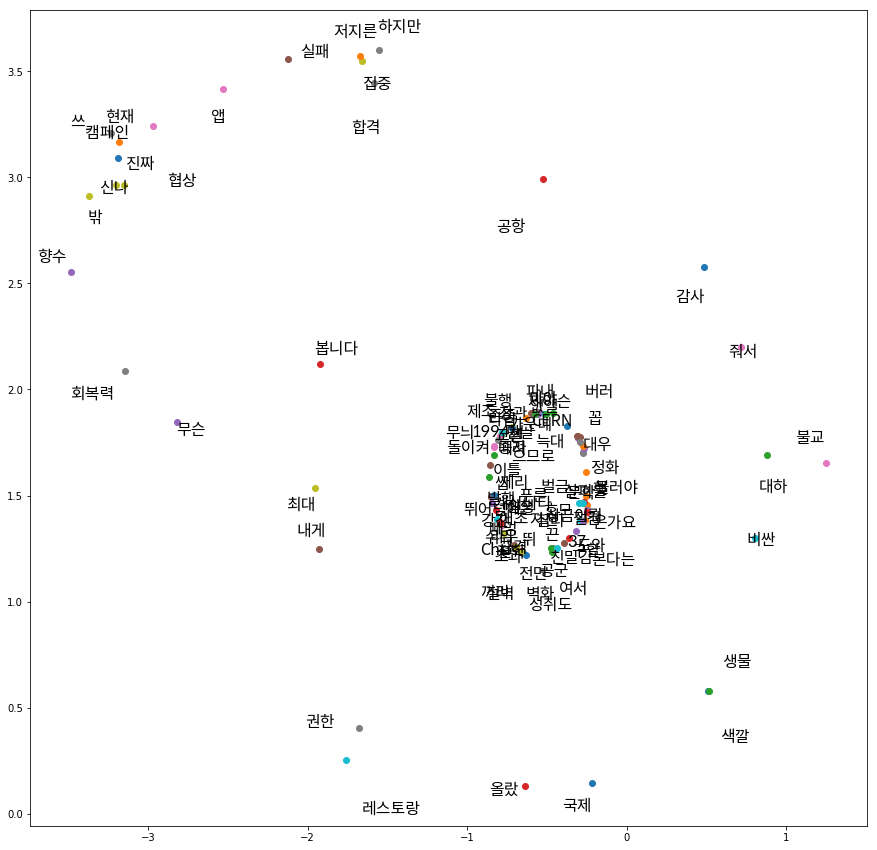

In [25]:
visualize(p, 100, 10)

# Similarity Measures

In [26]:
import torch

### L1 Norm

$$
\text{d}_{\text{L1}}(w,v)=\sum_{i=1}^d{|w_i-v_i|},\text{ where }w,v\in\mathbb{R}^d.
$$

In [34]:
def get_l1_distance(x1, x2):
    return ((x1 - x2).abs()).sum()

### L2 Norm

$$
\text{d}_{\text{L2}}(w,v)=\sqrt{\sum_{i=1}^d{(w_i-v_i)^2}},\text{ where }w,v\in\mathbb{R}^d.
$$

In [35]:
def get_l2_distance(x1, x2):
    return ((x1 - x2)**2).sum()**.5

### infinity distance 

$$
d_{\infty}(w,v)=\max(|w_1-v_1|,|w_2-v_2|,\cdots,|w_d-v_d|),\text{ where }w,v\in\mathbb{R}^d
$$

In [29]:
def get_infinity_distance(x1, x2):
    return ((x1 - x2).abs()).max()

### cos similarty

$$
\begin{aligned}
\text{sim}_{\text{cos}}(w,v)&=\overbrace{\frac{w\cdot v}{|w||v|}}^{\text{dot product}}
=\overbrace{\frac{w}{|w|}}^{\text{unit vector}}\cdot\frac{v}{|v|} \\
&=\frac{\sum_{i=1}^{d}{w_iv_i}}{\sqrt{\sum_{i=1}^d{w_i^2}}\sqrt{\sum_{i=1}^d{v_i^2}}} \\
\text{where }&w,v\in\mathbb{R}^d
\end{aligned}
$$

In [30]:
def get_cosine_similarity(x1, x2):
    return (x1 * x2).sum() / ((x1**2).sum()**.5 * (x2**2).sum()**.5)

### jaccard similarity

$$
\begin{aligned}
\text{sim}_{\text{jaccard}}(w,v)&=\frac{|w \cap v|}{|w \cup v|} \\
&=\frac{|w \cap v|}{|w|+|v|-|w \cap v|} \\
&\approx\frac{\sum_{i=1}^d{\min(w_i,v_i)}}{\sum_{i=1}^d{\max(w_i,v_i)}} \\
\text{where }&w,v\in\mathbb{R}^d.
\end{aligned}
$$

In [43]:
def get_jaccard_similarity(x1, x2):
    return torch.stack([x1, x2]).min(dim=0)[0].sum() / torch.stack([x1, x2]).max(dim=0)[0].sum()

#### 분자 산식 알아보기

In [48]:
x1=torch.Tensor([1,2,3])

In [49]:
type(x1)

torch.Tensor

In [50]:
x2=torch.Tensor([3,4,5])

In [51]:
help(torch.stack)

Help on built-in function stack:

stack(...)
    stack(seq, dim=0, out=None) -> Tensor
    
    Concatenates sequence of tensors along a new dimension.
    
    All tensors need to be of the same size.
    
    Arguments:
        seq (sequence of Tensors): sequence of tensors to concatenate
        dim (int): dimension to insert. Has to be between 0 and the number
            of dimensions of concatenated tensors (inclusive)
        out (Tensor, optional): the output tensor



In [53]:
x3 = torch.stack([x1,x2])

In [54]:
x3.shape

torch.Size([2, 3])

#### dim은 차원을 표시한다

In [56]:
 torch.stack([x1, x2]).min(dim=0)

(tensor([1., 2., 3.]), tensor([0, 0, 0]))

In [55]:
 torch.stack([x1, x2]).min(dim=0)[0].sum()

tensor(6.)

In [57]:
 torch.stack([x1, x2]).min(dim=1)

(tensor([1., 3.]), tensor([0, 0]))

In [59]:
torch.stack([x1, x2]).max(dim=0)

(tensor([3., 4., 5.]), tensor([1, 1, 1]))

In [58]:
torch.stack([x1, x2]).max(dim=0)[0].sum()

tensor(12.)

### 구하기

In [44]:
def get_nearest(query, dataframe, metric, top_k, ascending=True):
    vector = torch.FloatTensor(dataframe.loc[query].values)
    distances = dataframe.apply(lambda x: metric(vector, torch.FloatTensor(x.values)), axis=1)
    top_distances = distances.sort_values(ascending=ascending)[:top_k]

    print(', '.join([f'{k} ({v:.1f})' for k, v in top_distances.items()]))

In [45]:
print('L1 distance:')
get_nearest('우리', p, get_l1_distance, 30)
print('\nL2 distance:')
get_nearest('우리', p, get_l2_distance, 30)
print('\nInfinity distance:')
get_nearest('우리', p, get_infinity_distance, 30)
print('\nCosine similarity:')
get_nearest('우리', p, get_cosine_similarity, 30, ascending=False)
print('\nJaccard similarity:')
get_nearest('우리', p, get_jaccard_similarity, 30, ascending=False)

L1 distance:
우리 (0.0), 저 (20175.0), 제 (22012.0), 여러분 (26012.0), 그 (28045.0), 그것 (29132.0), 이것 (29255.0), 문제 (30778.0), 이런 (30946.0), 자신 (31246.0), 당신 (31319.0), 나 (31349.0), 모든 (31455.0), 어떤 (31491.0), 이야기 (31519.0), 요 (31690.0), 하나 (31862.0), 다른 (31900.0), 그리고 (31938.0), 여기 (32114.0), 모두 (32125.0), 사실 (32126.0), 어떻게 (32141.0), 저희 (32193.0), 아이 (32202.0), 곳 (32213.0), 그녀 (32292.0), 세계 (32363.0), 다 (32387.0), 세상 (32445.0)

L2 distance:
우리 (0.0), 제 (4452.8), 저 (4513.5), 에서 (5276.8), 그 (5523.3), 한 (5594.5), 과 (6067.9), 일 (6115.3), 를 (6130.3), 로 (6144.2), 없 (6204.3), 여러분 (6210.2), " (6237.2), 문제 (6290.1), 나 (6409.6), 와 (6425.6), 되 (6457.3), 모든 (6470.7), 다른 (6486.4), 더 (6538.8), 하나 (6552.8), 데 (6573.9), 이런 (6574.7), 거 (6579.0), 그것 (6579.7), 이것 (6581.8), 방법 (6593.9), 이유 (6618.8), 모두 (6632.7), 에게 (6654.1)

Infinity distance:
우리 (0.0), 되 (2764.0), 에 (2880.0), 한 (3145.0), 없 (3222.0), 를 (3350.0), 의 (3542.0), 그 (3606.0), 제 (3773.0), 으로 (3837.0), 에서 (3876.0), 로 (3947.0), " (3960.0), 에게 (3965.0), 일

# Thesaurus Based Method: Lesk Algorithm

In [60]:
from nltk.corpus import wordnet as wn
for ss in wn.synsets('bass'):
    print(ss, ss.definition())

Synset('bass.n.01') the lowest part of the musical range
Synset('bass.n.02') the lowest part in polyphonic music
Synset('bass.n.03') an adult male singer with the lowest voice
Synset('sea_bass.n.01') the lean flesh of a saltwater fish of the family Serranidae
Synset('freshwater_bass.n.01') any of various North American freshwater fish with lean flesh (especially of the genus Micropterus)
Synset('bass.n.06') the lowest adult male singing voice
Synset('bass.n.07') the member with the lowest range of a family of musical instruments
Synset('bass.n.08') nontechnical name for any of numerous edible marine and freshwater spiny-finned fishes
Synset('bass.s.01') having or denoting a low vocal or instrumental range


In [61]:
def lesk(sentence, word):
    from nltk.wsd import lesk

    best_synset = lesk(sentence.split(), word)
    print(best_synset, best_synset.definition())

In [62]:
sentence = 'I went fishing last weekend and I got a bass and cooked it'
word = 'bass'
lesk(sentence, word)

Synset('sea_bass.n.01') the lean flesh of a saltwater fish of the family Serranidae


In [63]:
sentence = 'I love the music from the speaker which has strong beat and bass'
word = 'bass'
lesk(sentence, word)

Synset('bass.n.02') the lowest part in polyphonic music


In [64]:
sentence = 'I think the bass is more important than guitar'
word = 'bass'
lesk(sentence, word)

Synset('sea_bass.n.01') the lean flesh of a saltwater fish of the family Serranidae


# Similarity Based Method [Erk et al.2007]

In [69]:
from konlpy.tag import Mecab

def count_seen_headwords(lines, predicate='VV', headword='NNG'):
    mecab = Mecab()
    seen_dict = {}
    
    for line in lines:
        pos_result = mecab.pos(line)
        
        word_h = None
        word_p = None
        for word, pos in pos_result:
            if pos == predicate or pos[:3] == predicate + '+':
                word_p = word
                break
            if pos == headword:
                word_h = word
        
        if word_h is not None and word_p is not None:
            seen_dict[word_p] = [word_h] + ([] if seen_dict.get(word_p) is None else seen_dict[word_p])
            
    return seen_dict

$$
(w,h,R),\text{ where }R\text{ is a relationship, such as verb-object}.
$$

$$
A_R(w,h_0)=\sum_{h\in\text{Seen}_R(w)}{\text{sim}(h_0,h)\cdot \phi_R(w,h)}
$$

In [66]:
def get_selectional_association(predicate, headword, lines, dataframe, metric):
    v1 = torch.FloatTensor(dataframe.loc[headword].values)
    seens = count_seen_headwords(lines)[predicate]
    
    total = 0
    for seen in seens:
        try:
            v2 = torch.FloatTensor(dataframe.loc[seen].values)
            total += metric(v1, v2)
        except:
            pass
        
    return total

In [70]:
def wsd(query_p, query_h):
    selectional_associations = []
    for h in query_h:
        selectional_associations += [get_selectional_association(query_p, h, lines, p, get_cosine_similarity)]

    print(selectional_associations)

In [75]:
wsd('피우', ['담배', '맥주', '사과'])

[tensor(0.3100), tensor(0.3501), tensor(0.4294)]
